In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


sns.set_style("whitegrid")

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline

pd.set_option('display.max_columns', None)

In [34]:
dados = pd.read_csv("https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv")
# dados = pd.read_csv("dados/DADOS/MICRODADOS_ENEM_2018.csv", encoding='latin1', sep=";")
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2211001,Teresina,22,PI,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3557105,Votuporanga,35,SP,1.00,1.00,1.00,1.00,448.00,454.00,457.00,460.00,523.10,671.30,661.60,738.00,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2506301,Guarabira,25,PB,1.00,1.00,1.00,1.00,447.00,451.00,455.00,459.00,409.20,531.70,389.00,438.10,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",D

In [8]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_nota = dados[colunas_de_notas].dropna()
dados_nota.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_nota.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [6]:
dados_nota.shape

(97270, 5)

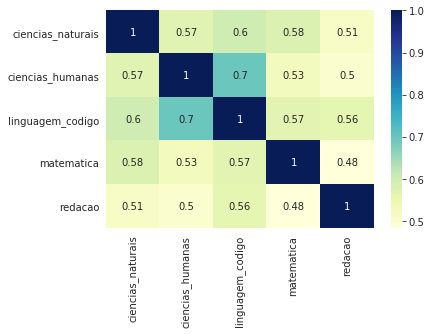

In [16]:
corr = dados_nota.corr()

sns.heatmap(corr, annot=True,cmap="YlGnBu")

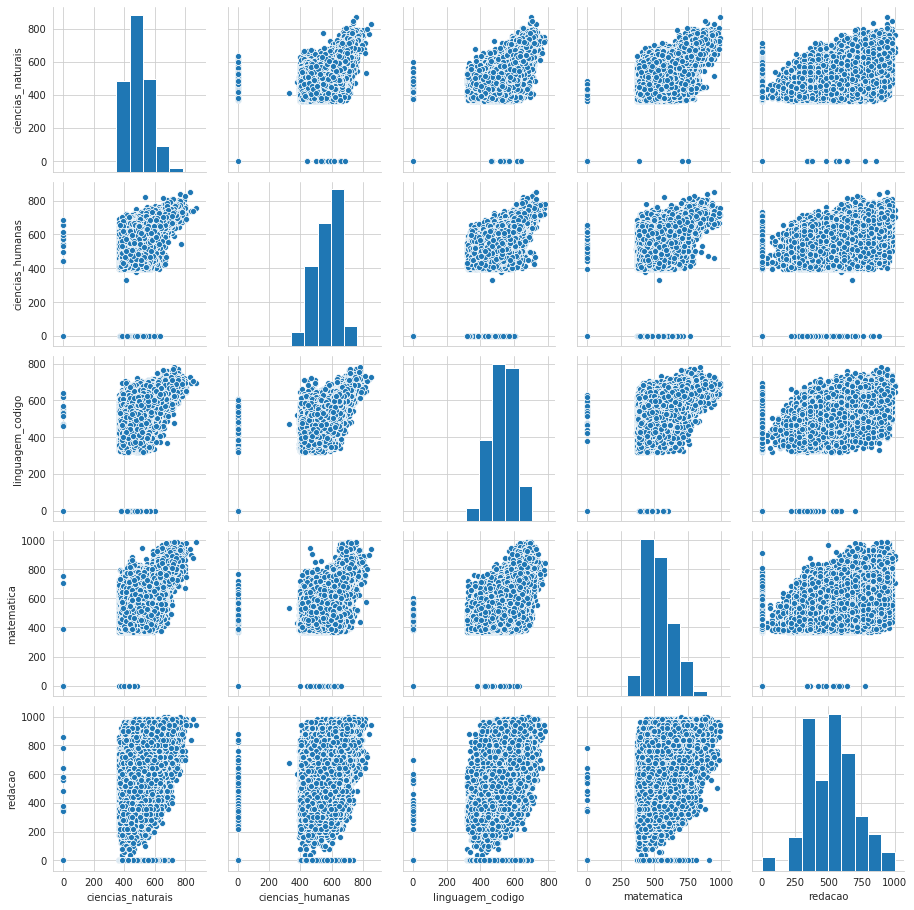

In [17]:
sns.pairplot(dados_nota)

### Desafio 1 e 4: Se a pessoa não teve presença, preencher a nota da pessoa com algum número. A nota 0? A nota média? A Mediana?

Primeiro vou remover os alunos que não tiveram presença em nenhuma matéria.

Os alunos que fizeram pelo menos uma prova, eu vou dar nota 0.

In [97]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

In [100]:
# Removendo apenas os que não tem presença em nenhuma prova.
dados_nota = dados.copy()
# Verificando o tamanho do dataframe para fins de comparação
print(dados_nota.shape[0])

137844


In [101]:
# Pegando o index de todos os alunos que não foram fazer nenhuma prova
dados_delete = dados_nota[
    (dados['TP_PRESENCA_CN'] == 0) & 
    (dados['TP_PRESENCA_CH'] == 0) &
    (dados['TP_PRESENCA_LC'] == 0) &
    (dados['TP_PRESENCA_MT'] == 0)
].index

In [102]:
# Deletando de dados_nota todos os alunos que não fizeram nenhuma prova
dados_nota.drop(index=dados_delete, inplace=True)

In [103]:
print(dados.shape[0] - dados_nota.shape[0], " Não fizeram nenhuma prova e foram removidos do DF")

33763  Não fizeram nenhuma prova e foram removidos do DF


In [71]:
# Verificando pessoas que fizeram pelo menos uma prova.
# Aqui as notas das provas faltantes serão setadas como 0
dados_fez_uma_prova = dados_nota[
    (dados['TP_PRESENCA_CN'] == False) |
    (dados['TP_PRESENCA_CH'] == False) |
    (dados['TP_PRESENCA_LC'] == False) |
    (dados['TP_PRESENCA_MT'] == False)
]

/home/cesar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [127]:
# Nota 0 para as provas que não foram feitas
dados_nota.fillna(0, inplace=True)

In [60]:
print(dados_fez_uma_prova.shape[0], " Fizeram pelo menos uma prova.")

6776  Fizeram pelo menos uma prova.


In [111]:
dados_nota[colunas_de_notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


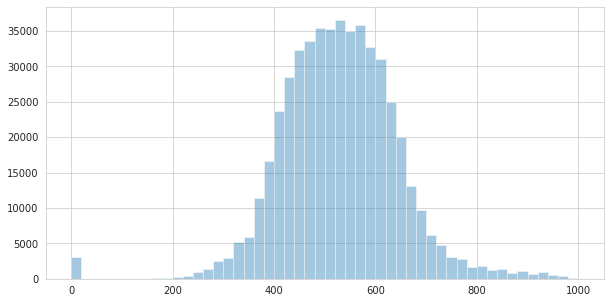

In [104]:
# Verificando a distribuição das notas
plt.figure(figsize=(10,5))
sns.distplot(dados_nota[colunas_de_notas], kde=False)

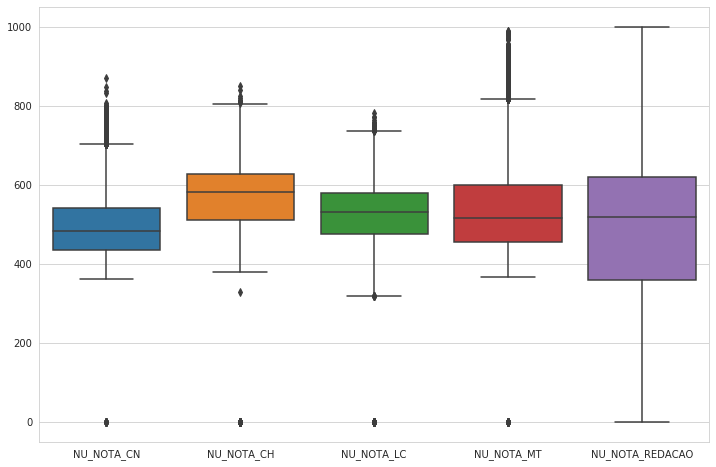

In [105]:
# BoxPlot para ver como foram as notas por matéria
# A redação ao que parece teve uma variância maior
plt.figure(figsize=(12,8))
sns.boxplot(data=dados_nota[colunas_de_notas])

In [91]:
dados_nota[colunas_de_notas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,"104,081.00","104,081.00","104,081.00","104,081.00","104,081.00"
mean,462.60,566.63,525.04,501.53,507.63
std,139.70,86.58,78.31,163.66,188.77
min,0.00,0.00,0.00,0.00,0.00
25%,426.10,509.60,475.20,443.50,360.00
50%,476.70,582.00,530.90,508.00,520.00
75%,537.90,627.90,579.60,592.30,620.00
max,869.60,850.40,781.40,989.90,"1,000.00"


### Desafio 2: Fazer uma matriz de correlação melhor entre as notas

In [108]:
corr = dados_nota[colunas_de_notas].corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.57,0.60,0.58,0.51
NU_NOTA_CH,0.57,1.00,0.70,0.53,0.50
NU_NOTA_LC,0.60,0.70,1.00,0.57,0.56
NU_NOTA_MT,0.58,0.53,0.57,1.00,0.48
NU_NOTA_REDACAO,0.51,0.50,0.56,0.48,1.00


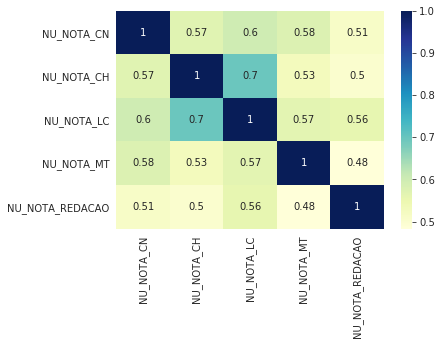

In [126]:
# Plotando um heatMap com as correlações
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

### Desafio 3: Pairplot dos acertos de cada categoria (CN, CH, MT, LC, NOTA PURA DA REDAÇÃO) USAR GABARITO E RESPOSTAS